# install

# import

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

## google drive mount

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
# change work directory and check on where you are 
!ls

drive  sample_data


# directories

In [4]:
#change work directory
os.chdir("/content/drive/My Drive/images/")

In [5]:
# var my directory
mydir = os.getcwd()
mydir

'/content/drive/My Drive/images'

In [19]:
def find_csv_filenames( path_to_dir, suffix=".csv" ):
    filenames = os.listdir(path_to_dir)
    return [ filename for filename in filenames if filename.endswith( suffix ) ]

In [21]:
#files_in_sub = os.listdir(mydir)
files_in_sub = find_csv_filenames(mydir, suffix=".csv" )
files_in_sub = sorted(files_in_sub)
for i,file in enumerate(files_in_sub):
  print (i,file)

0 1_model1.csv
1 2_model2.csv
2 3_model3.csv
3 4_model4.csv
4 5_training_loss_models.csv
5 6_evaluation_accuracy_models.csv
6 7_best_model_growing_size.csv
7 accuracy_full.csv
8 datasets_overview.csv
9 training_loss_full.csv
10 training_loss_model_sizes.csv


## create images folder if it doesnt exist yet

In [ ]:
images_folder = mydir + "/images/"
try: 
    os.mkdir(images_folder) 
    print ("-created sub_dir: %s" %images_folder)
except OSError as error: 
  print(error) 

[Errno 17] File exists: '/content/drive/My Drive/images/images/'


#functions utilities

In [7]:
def get_color_list(set_colors):
  by_hsv = ((tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(color))),
                    name)
                  for name, color in set_colors.items())
  names = [name for hsv, name in by_hsv]
  return names

In [8]:
set_colors = [mcolors.BASE_COLORS, mcolors.CSS4_COLORS]
#get_color_list(set_colors[1])

In [9]:
def get_best_color_list(num_models):
  print (num_models)
  if num_models<=8:
    color_list = get_color_list(set_colors[0])
  else:
    color_list = get_color_list(set_colors[1])
  return color_list

In [10]:
def color_best_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = 'red' if val == absolute_min  else 'black'
    return 'color: %s' % color

In [11]:
def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: red' if v else '' for v in is_max]

In [12]:
def highlight_min(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.min()
    return ['background-color: yellow' if v else '' for v in is_max]

#ALL

## load all files in their own dataframe

In [26]:
all_dataframes = dict()

# load overview files
all_data = files_in_sub#[14:15][0]
for i,data in enumerate(all_data):
  print ("-" *60)
  print (i, data)
  this_df =  pd.read_csv('%s'%data, sep=',',index_col=0 , engine='python',skiprows = 1,nrows = 15)
  print (this_df.head(20))
  all_dataframes[data] = this_df

# this only outputs the raw lines

------------------------------------------------------------
0 1_model1.csv
                                                    high-def loss  ...  Unnamed: 10
model-ex-001                                                20.82  ...          NaN
model-ex-002                                               11.678  ...          NaN
model-ex-003                                                10.62  ...          NaN
model-ex-004                                               10.497  ...          NaN
model-ex-005                                                9.852  ...          NaN
model-ex-006                                                9.839  ...          NaN
model-ex-007                                                9.526  ...          NaN
model-ex-008                                                 9.17  ...          NaN
model-ex-009                                                8.911  ...          NaN
model-ex-010                                                8.824  ...          NaN


    model_4  model 4_bigger_input  model_4_longer_training 
1     17.40                17.084                    17.885
2     10.44                11.592                    11.830
3     10.01                10.734                    11.152
4      9.42                10.222                    10.601
5      9.12                 9.824                    10.512
6      8.57                 9.660                    10.221
7      8.20                 9.169                     9.919
8      7.98                 8.903                     9.713
9      7.73                 8.643                     9.608
10     7.42                 8.586                     9.374
25     7.42                 8.586                     6.917
27     7.42                 8.586                     6.859
28     7.42                 8.586                     6.797
45     7.42                 8.586                     6.795
69     7.42                 8.586                     6.788
3


Text(0.5, 1.0, ' training loss of model 4,4_biggerInput,4_longerTrain ')

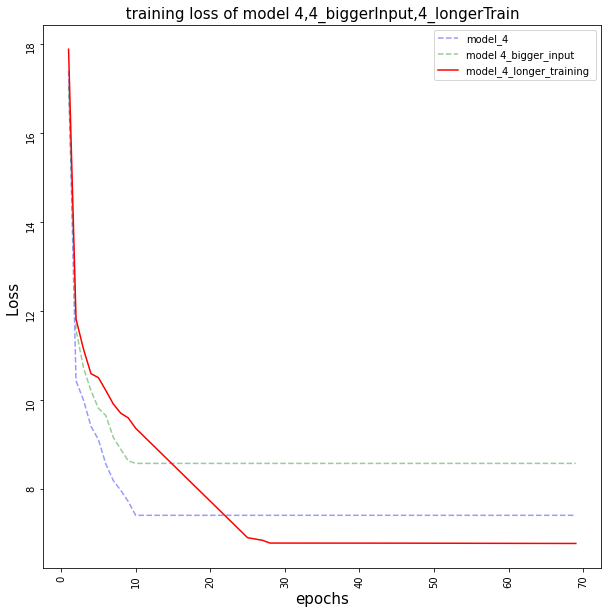

In [28]:
df = all_dataframes["training_loss_full.csv"]
title = "training loss of model 4,4_biggerInput,4_longerTrain"
print (df.head(20))
all_min = df.min()
absolute_min = all_min.min()
num_epochs, num_models = df.shape

#print (num_epochs, num_models)
all_colors = get_best_color_list(num_models)
all_columns = df.columns.tolist()

# get out the columns as lists
x_ax = df.index.tolist()
Y = dict() # dictionary

for c in all_columns:
  Y[c] = df[c].tolist()
  
fig = plt.figure(figsize=(10, 10))

thishandles=[]
for j in range(len(Y)):
    if j != len(Y)-1:
      key = list(Y.keys())[j]
      y = Y[key]
      this_color = all_colors[j]
      this_alpha = 0.4
      this_label = all_columns[j]
      plt.plot(x_ax, y,"--", color= this_color, alpha = this_alpha, label = this_label)
      thishandles.append(this_label)
    
    else:
      key = list(Y.keys())[j]
      y = Y[key]
      this_color = all_colors[j]
      this_alpha = 1
      this_label = all_columns[j]
      plt.plot(x_ax, y, color= this_color, alpha = this_alpha, label = this_label)
      thishandles.append(this_label)

plt.xticks(rotation=90)
plt.yticks(rotation=90)
plt.legend(thishandles)
plt.xlabel("epochs", fontsize=15)
plt.ylabel("Loss ", fontsize=15)
plt.title(" %s " %(title) , fontsize=15)

In [29]:
four_models_accuracy= all_dataframes["6_evaluation_accuracy_models.csv"] 

In [30]:
# drop last column from df growing size
thisdf = all_dataframes['7_best_model_growing_size.csv']

# pandas drop a column with drop function
thisdf = thisdf.drop(['#'], axis=1)
all_dataframes['7_best_model_growing_size.csv'] = thisdf

In [33]:
top_models_training = thisdf.copy()
#top_models_training = top_models_training.drop([ "model_4" ,"model 4_bigger_input",  "model_4_longer_training"], axis=1)
top_models_training

,model 4,model 5,model 6,model 4.1,model 5.1,model 6.1
epoch_01,17.40,17.084,17.885,0.3203,0.4101,0.4012
epoch_02,10.44,11.592,9.374,0.2707,0.6231,0.5663
epoch_03,10.01,10.734,7.063,0.512,0.4629,0.6277
epoch_04,9.42,10.222,7.023,0.5152,0.7178,0.6236
epoch_05,9.12,9.824,6.987,0.5793,0.5925,0.6329
epoch_06,8.57,9.660,6.917,0.5363,0.677,0.6190
epoch_07,8.20,9.169,6.859,0.6443,0.7561,0.6191
epoch_08,7.98,8.903,6.797,0.6609,0.7585,0.6174
epoch_09,7.73,8.643,6.795,0.499,0.755,0.6196
epoch_10,7.42,8.586,6.788,0.6323,0.7241,0.6204


In [34]:
accuracy_full = files_in_sub[8:9]
accuracy_full

['datasets_overview.csv']

In [ ]:
#data =all_dataframes["datasets_overview.csv"]
#print ("")
#print (data)
#accuracy_full =  pd.read_csv('%s'%data, sep=',',index_col=0 , engine='python',skiprows = 1,nrows = 16)
df = all_dataframes["datasets_overview.csv"]
title = "accuracy of model 4,4_biggerInput,4_longerTrain"
print (df.head(20))
all_min = df.min()
absolute_min = all_min.min()
num_epochs, num_models = df.shape

#print (num_epochs, num_models)
all_colors = get_best_color_list(num_models)
all_columns = df.columns.tolist()

# get out the columns as lists
x_ax = df.index.tolist()
Y = dict() # dictionary

for c in all_columns:
  Y[c] = df[c].tolist()
  
fig = plt.figure(figsize=(10, 10))

thishandles=[]
for j in range(len(Y)):
    if j != len(Y)-1:
      key = list(Y.keys())[j]
      y = Y[key]
      this_color = all_colors[j]
      this_alpha = 0.4
      this_label = all_columns[j]
      plt.plot(x_ax, y,"--", color= this_color, alpha = this_alpha, label = this_label)
      thishandles.append(this_label)
    
    else:
      key = list(Y.keys())[j]
      y = Y[key]
      this_color = all_colors[j]
      this_alpha = 1
      this_label = all_columns[j]
      plt.plot(x_ax, y, color= this_color, alpha = this_alpha, label = this_label)
      thishandles.append(this_label)

plt.xticks(rotation=90)
plt.yticks(rotation=90)
plt.legend(thishandles)
plt.xlabel("epochs", fontsize=15)
plt.ylabel("Accuracy ", fontsize=15)
plt.title(" %s " %(title) , fontsize=15)

3


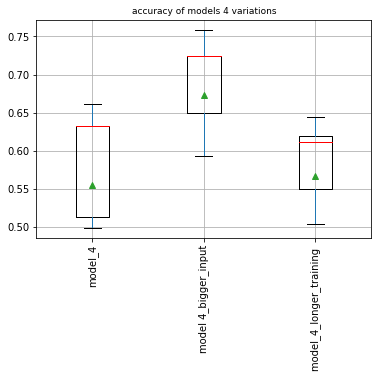

In [ ]:
num_epochs, num_models = df.shape
label = "accuracy of models 4 variations"
#df.style.apply(highlight_min)

#print (num_epochs, num_models)
all_colors = get_best_color_list(num_models)
all_columns = df.columns.tolist()
#fig, ax = plt.subplots()


# boxplots
# demonstrate how to customize the display different elements:
boxprops = dict(linestyle='-', linewidth=1, color='k')
medianprops = dict(linestyle='-', linewidth=1, color='r')

plt.figure()
ax = df.boxplot(column=all_columns,
          showfliers=False, showmeans=True,
          boxprops=boxprops,
          medianprops=medianprops)
plt.title("%s" %label,fontsize=9)
# get rid of the automatic 'Boxplot grouped by group_by_column_name' title
plt.suptitle("")
ax.set_xticklabels(labels = all_columns ,rotation=90)
plt.savefig(mydir+ "/"+'box_plot_4_variations.png')
plt.show()

## all boxplots

In [ ]:
boxplot_df = []
boxplot_df.append(four_models_accuracy)
boxplot_df.append(top_models_eval)
labels = ["accuracy of prediction of 4 models, evaluated over 3 different sets", "accuracy of prediction of same model(4) in images with low deformation, with different size input and training duration"]

# all box plots
counter = 1
for i,df in enumerate(boxplot_df):
  label = labels[i]
  print (df.head(20))#.style.apply(highlight_max)
  all_min = df.min()
  absolute_min = all_min.min()
  num_epochs, num_models = df.shape

  #df.style.apply(highlight_min)

  #print (num_epochs, num_models)
  all_colors = get_best_color_list(num_models)
  all_columns = df.columns.tolist()
  #fig, ax = plt.subplots()


  # boxplots
  # demonstrate how to customize the display different elements:
  boxprops = dict(linestyle='-', linewidth=1, color='k')
  medianprops = dict(linestyle='-', linewidth=1, color='r')

  plt.figure(counter)
  ax = df.boxplot(column=all_columns,
            showfliers=False, showmeans=True,
            boxprops=boxprops,
            medianprops=medianprops)
  plt.title("%s" %label,fontsize=9)
  # get rid of the automatic 'Boxplot grouped by group_by_column_name' title
  plt.suptitle("")
  ax.set_xticklabels(labels = all_columns ,rotation=90)
  #plt.xticks(rotation=‌​45)

  plt.show()
  #fig.tight_layout(pad=3.0)

In [ ]:
# all box plots
counter = 1
for key in list(all_dataframes.keys()):
  df = all_dataframes[key]
  print (key)
  print (df.head(20))
  all_min = df.min()
  absolute_min = all_min.min()
  num_epochs, num_models = df.shape

  #df.style.apply(highlight_min)

  #print (num_epochs, num_models)
  all_colors = get_best_color_list(num_models)
  all_columns = df.columns.tolist()
  #fig, ax = plt.subplots()


  # boxplots
  # demonstrate how to customize the display different elements:
  boxprops = dict(linestyle='-', linewidth=1, color='k')
  medianprops = dict(linestyle='-', linewidth=1, color='k')

  plt.figure(counter)
  ax = df.boxplot(column=all_columns,
            showfliers=False, showmeans=True,
            boxprops=boxprops,
            medianprops=medianprops)
  plt.title("Boxplot of %s" %key,fontsize=15)
  # get rid of the automatic 'Boxplot grouped by group_by_column_name' title
  plt.suptitle("")
  ax.set_xticklabels(labels = all_columns ,rotation=90)
  #plt.xticks(rotation=‌​45)

  plt.show()
  #fig.tight_layout(pad=3.0)

## all plots

In [ ]:
key = list(all_dataframes.keys())[0]
df = all_dataframes[key]
# get out the columns as lists
x_ax = df.index.tolist()
Y = dict() # dictionary

#for c in all_columns:
  #Y[c] = df[c].tolist()

5_training_loss_models.csv
          model_1  model_2  model_3  model_4  Unnamed: 5
epoch_01    19.50    18.41    18.24    17.40         NaN
epoch_02    11.64    10.43    10.77    10.44         NaN
epoch_03    11.01     9.76    10.15    10.01         NaN
epoch_04    10.71     9.25     9.78     9.42         NaN
epoch_05     9.98     8.85     9.51     9.12         NaN
epoch_06     9.78     8.56     9.15     8.57         NaN
epoch_07     9.51     8.25     8.83     8.20         NaN
epoch_08     9.31     8.04     8.63     7.98         NaN
epoch_09     9.02     7.70     8.46     7.73         NaN
epoch_10     8.92     7.61     7.88     7.42         NaN
5
6_evaluation_accuracy_models.csv
          model_1_low  model_2_low  ...  model_3_high  model_4_high
epoch_01       0.2397       0.3643  ...        0.0146        0.2117
epoch_02       0.2958       0.4151  ...        0.3918        0.3023
epoch_03       0.3331       0.3332  ...        0.4524        0.3891
epoch_04       0.3476       0.2797  ...

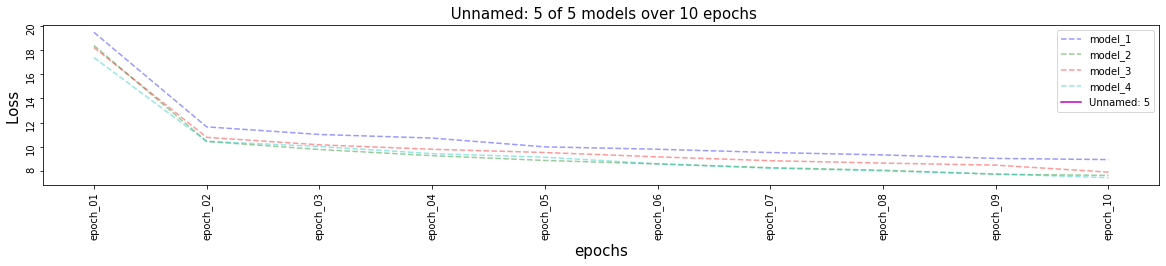

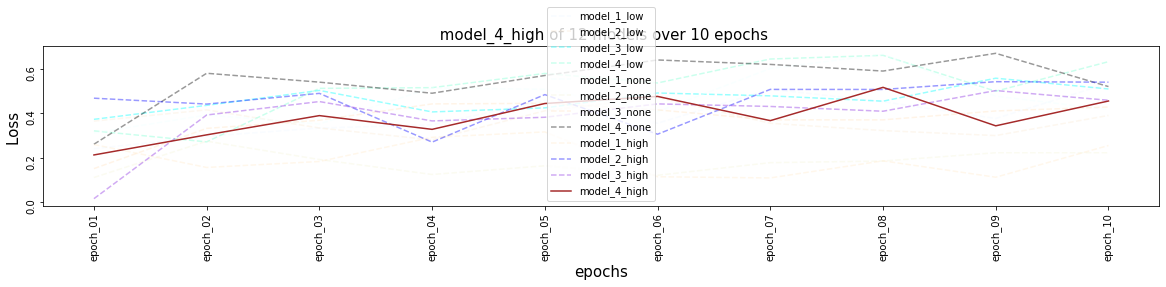

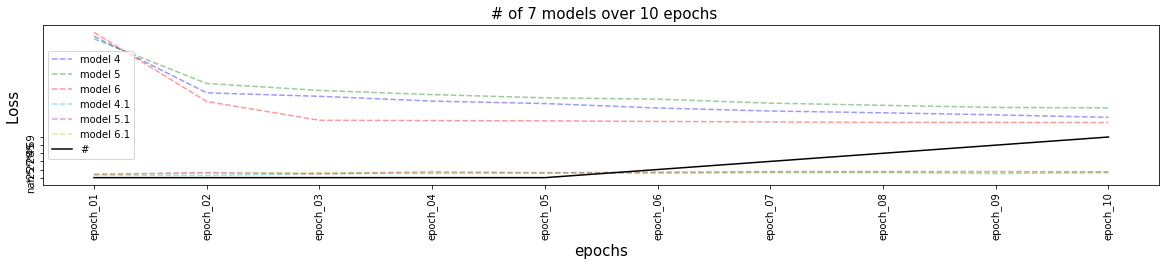

In [ ]:
# all plots
counter = 1
for key in list(all_dataframes.keys()):
  df = all_dataframes[key]
  print (key)
  print (df.head(20))
  all_min = df.min()
  absolute_min = all_min.min()
  num_epochs, num_models = df.shape

  #print (num_epochs, num_models)
  all_colors = get_best_color_list(num_models)
  all_columns = df.columns.tolist()

  # get out the columns as lists
  x_ax = df.index.tolist()
  Y = dict() # dictionary

  for c in all_columns:
    Y[c] = df[c].tolist()
    
  fig = plt.figure(figsize=(20, 10))

  plt.subplot(3, 1, counter)

  thishandles=[]
  for j in range(len(Y)):
      if j != len(Y)-1:
        key = list(Y.keys())[j]
        y = Y[key]
        this_color = all_colors[j]
        this_alpha = 0.4
        this_label = all_columns[j]
        plt.plot(x_ax, y,"--", color= this_color, alpha = this_alpha, label = this_label)
        thishandles.append(this_label)
      
      else:
        key = list(Y.keys())[j]
        y = Y[key]
        this_color = all_colors[j]
        this_alpha = 1
        this_label = all_columns[j]
        plt.plot(x_ax, y, color= this_color, alpha = this_alpha, label = this_label)
        thishandles.append(this_label)

  plt.xticks(rotation=90)
  plt.yticks(rotation=90)
  plt.legend(thishandles)
  plt.xlabel("epochs", fontsize=15)
  plt.ylabel("Loss ", fontsize=15)
  plt.title(" %s of %s models over %s epochs" %(key,num_models,num_epochs) , fontsize=15)
  counter += 1

# MODELs DF

## load model files


In [39]:
files_in_sub


['1_model1.csv',
 '2_model2.csv',
 '3_model3.csv',
 '4_model4.csv',
 '5_training_loss_models.csv',
 '6_evaluation_accuracy_models.csv',
 '7_best_model_growing_size.csv',
 'accuracy_full.csv',
 'datasets_overview.csv',
 'training_loss_full.csv',
 'training_loss_model_sizes.csv']

In [42]:
all_models_dataframes = dict()

# load overview files
for data in files_in_sub[0:8]:
  print ("")
  print (data)
  #list(range(0,8))
  df =  pd.read_csv('%s'%data, sep=',',index_col=0 , engine='python',skiprows = 1,nrows = 10, usecols=[0,4,5,6,7])
  print (df.head(20))
  #df.style.apply(highlight_max)

  all_models_dataframes[data] = df


1_model1.csv
              high-def acc  low-def acc   none-def acc       loss
model-ex-001        0.2587        0.2397        0.3108  19.497667
model-ex-002        0.1553        0.2958        0.3918  11.639333
model-ex-003        0.1822        0.3331        0.3512  11.009333
model-ex-004        0.2913        0.3476        0.5142  10.706333
model-ex-005        0.3155        0.4583        0.5076   9.983333
model-ex-006        0.1133        0.3548        0.4071   9.784667
model-ex-007        0.1081        0.5083        0.6016   9.508000
model-ex-008        0.1851        0.4519        0.6647   9.309333
model-ex-009        0.1113        0.3761        0.4768   9.023000
model-ex-010        0.2543        0.5347        0.4165   8.920667

2_model2.csv
              high-def acc  low-def acc  none-def acc  average loss
model-ex-001        0.4676       0.3643        0.1101       18.4090
model-ex-002        0.4411       0.4151        0.2738       10.4317
model-ex-003        0.4894       0.3332   

In [41]:
all_models_dataframes

{'1_model1.csv':               high-def acc  low-def acc   none-def acc       loss
 model-ex-001        0.2587        0.2397        0.3108  19.497667
 model-ex-002        0.1553        0.2958        0.3918  11.639333
 model-ex-003        0.1822        0.3331        0.3512  11.009333
 model-ex-004        0.2913        0.3476        0.5142  10.706333
 model-ex-005        0.3155        0.4583        0.5076   9.983333
 model-ex-006        0.1133        0.3548        0.4071   9.784667
 model-ex-007        0.1081        0.5083        0.6016   9.508000
 model-ex-008        0.1851        0.4519        0.6647   9.309333
 model-ex-009        0.1113        0.3761        0.4768   9.023000
 model-ex-010        0.2543        0.5347        0.4165   8.920667,
 '2_model2.csv':               high-def acc  low-def acc  none-def acc  average loss
 model-ex-001        0.4676       0.3643        0.1101       18.4090
 model-ex-002        0.4411       0.4151        0.2738       10.4317
 model-ex-003        0.

## min max

In [ ]:
data = '1_model1.csv'
df = all_models_dataframes[data]
df.style.apply(highlight_max)
df.style.apply(highlight_min)

,high-def acc,low-def acc,none-def acc,loss
model-ex-001,0.258700,0.239700,0.310800,19.497667
model-ex-002,0.155300,0.295800,0.391800,11.639333
model-ex-003,0.182200,0.333100,0.351200,11.009333
model-ex-004,0.291300,0.347600,0.514200,10.706333
model-ex-005,0.315500,0.458300,0.507600,9.983333
model-ex-006,0.113300,0.354800,0.407100,9.784667
model-ex-007,0.108100,0.508300,0.601600,9.508000
model-ex-008,0.185100,0.451900,0.664700,9.309333
model-ex-009,0.111300,0.376100,0.476800,9.023000
model-ex-010,0.254300,0.534700,0.416500,8.920667


## all models plots

In [ ]:
all_columns = df.columns.tolist()

# get out the columns as lists
x_ax = df.index.tolist()
Y = dict() # dictionary

for c in all_columns:
  Y[c] = df[c].tolist()
for j in range(len(Y)):
  print (j)

0
1
2
3



1_model1.csv
4

2_model2.csv
4

3_model3.csv
4


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



4_model4.csv
4


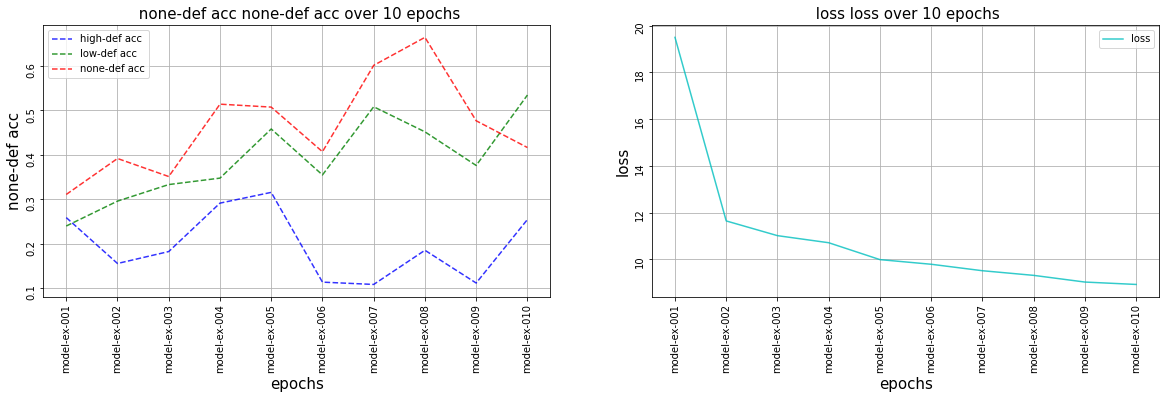

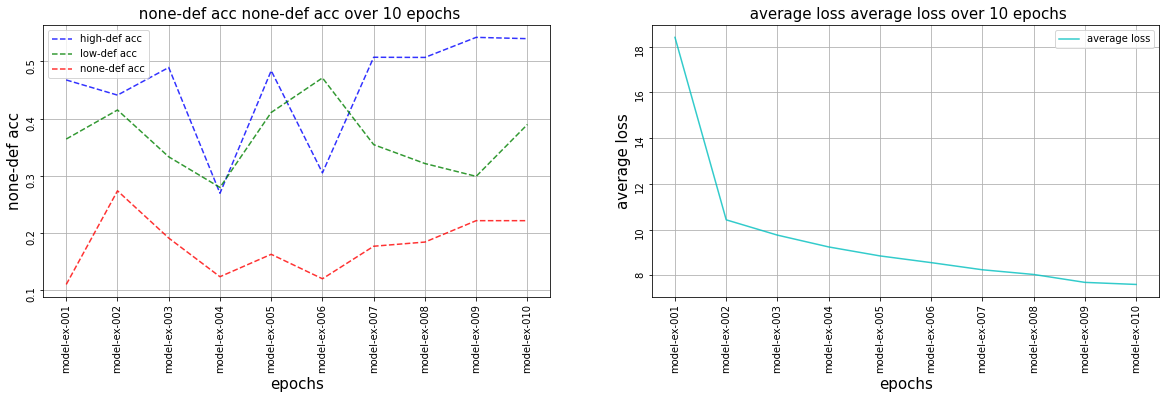

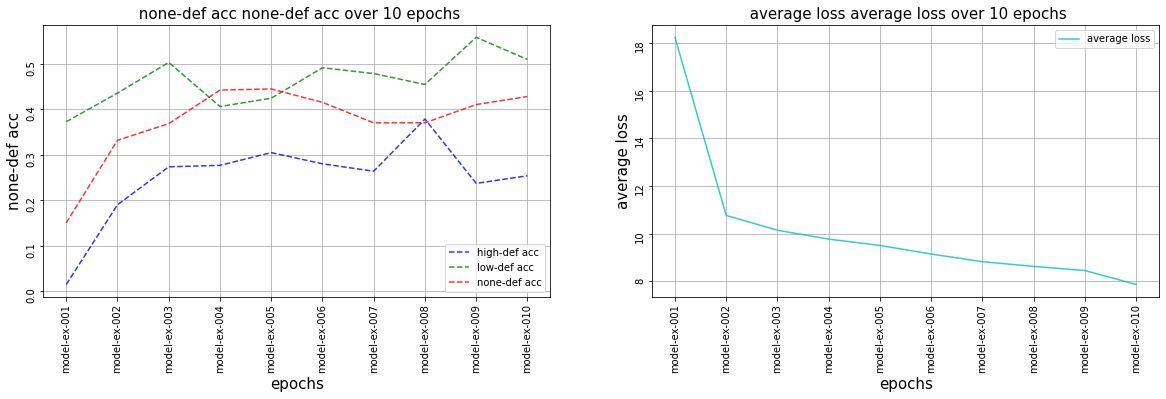

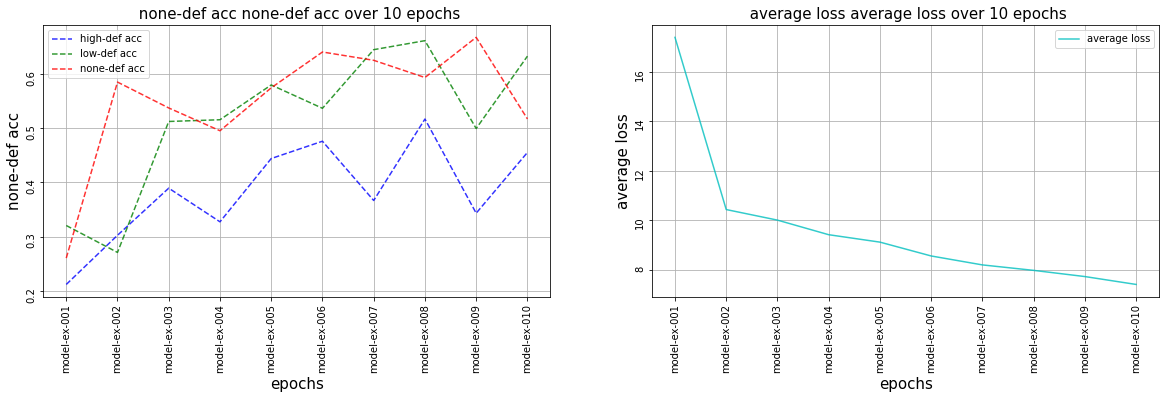

In [ ]:
# all models plots
counter = 1
for key in list(all_models_dataframes.keys()):
  df = all_models_dataframes[key]
  print ("")
  print (key)
  #print (df.head(20))
  all_min = df.min()
  absolute_min = all_min.min()
  num_epochs, num_models = df.shape

  #print (num_epochs, num_models)
  all_colors = get_best_color_list(num_models)
  all_columns = df.columns.tolist()

  # get out the columns as lists
  x_ax = df.index.tolist()
  Y = dict() # dictionary

  for c in all_columns:
    Y[c] = df[c].tolist()
    
  fig = plt.figure(figsize=(20, 5))

  plt.subplot(3, 1, counter)

  thishandles=[]
  for j in range(len(Y))[:3]:
    plt.subplot(1, 2, 1)
    key = list(Y.keys())[j]
    y = Y[key]
    this_color = all_colors[j]
    this_alpha = 0.8
    this_label = all_columns[j]
    plt.plot(x_ax, y,"--", color= this_color, alpha = this_alpha, label = this_label)
    thishandles.append(this_label)
    plt.grid()
    plt.xticks(rotation=90)
    plt.yticks(rotation=90)
    plt.legend(thishandles)
    plt.xlabel("epochs", fontsize=15)
    plt.ylabel("%s" %this_label, fontsize=15)
    plt.title(" %s %s over %s epochs" %(key,this_label ,num_epochs) , fontsize=15)

  plt.subplot(1, 2, 2)
  thishandles=[] 
  for j in range(len(Y))[3:]:
    key = list(Y.keys())[j]
    y = Y[key]
    this_color = all_colors[j]
    this_alpha = 0.8
    this_label = all_columns[j]
    plt.plot(x_ax, y, color= this_color, alpha = this_alpha, label = this_label)
    thishandles.append(this_label)
    plt.grid()
    plt.xticks(rotation=90)
    plt.yticks(rotation=90)
    plt.legend(thishandles)
    plt.xlabel("epochs", fontsize=15)
    plt.ylabel("%s"%this_label, fontsize=15)
    plt.title(" %s %s over %s epochs" %(key,this_label,num_epochs) , fontsize=15)


# one trial round

loading .csv file with results for various plots

In [ ]:
# Read a csv file to a dataframe with custom delimiter
df =  pd.read_csv('datasets_overview.csv', sep=',',index_col=0 , engine='python')
df.head(10)

,model_1,model_2,model_3,model_4,average
epoch_01,5.00,11.00,0.2587,20.820,9.269675
epoch_02,4.50,10.43,0.1553,11.678,6.690825
epoch_03,3.90,9.00,0.1822,10.620,5.925550
epoch_04,3.45,9.53,0.2913,10.497,5.942075
epoch_05,3.60,7.43,0.3155,9.852,5.299375
epoch_06,2.80,6.32,0.1133,9.839,4.768075
epoch_07,2.10,5.80,0.1081,9.526,4.383525
epoch_08,1.34,4.76,0.1851,9.170,3.863775
epoch_09,0.93,3.10,0.1113,8.911,3.263075
epoch_10,0.18,2.45,0.2543,8.824,2.927075


In [ ]:
all_min = df.min()
absolute_min = all_min.min()

In [ ]:
s = df.style.applymap(color_best_red)
s

,model_1,model_2,model_3,model_4,average
epoch_01,5.000000,11.000000,0.258700,20.820000,9.269675
epoch_02,4.500000,10.430000,0.155300,11.678000,6.690825
epoch_03,3.900000,9.000000,0.182200,10.620000,5.925550
epoch_04,3.450000,9.530000,0.291300,10.497000,5.942075
epoch_05,3.600000,7.430000,0.315500,9.852000,5.299375
epoch_06,2.800000,6.320000,0.113300,9.839000,4.768075
epoch_07,2.100000,5.800000,0.108100,9.526000,4.383525
epoch_08,1.340000,4.760000,0.185100,9.170000,3.863775
epoch_09,0.930000,3.100000,0.111300,8.911000,3.263075
epoch_10,0.180000,2.450000,0.254300,8.824000,2.927075


In [ ]:
df.style.apply(highlight_max)

,model_1,model_2,model_3,model_4,average
epoch_01,5.000000,11.000000,0.258700,20.820000,9.269675
epoch_02,4.500000,10.430000,0.155300,11.678000,6.690825
epoch_03,3.900000,9.000000,0.182200,10.620000,5.925550
epoch_04,3.450000,9.530000,0.291300,10.497000,5.942075
epoch_05,3.600000,7.430000,0.315500,9.852000,5.299375
epoch_06,2.800000,6.320000,0.113300,9.839000,4.768075
epoch_07,2.100000,5.800000,0.108100,9.526000,4.383525
epoch_08,1.340000,4.760000,0.185100,9.170000,3.863775
epoch_09,0.930000,3.100000,0.111300,8.911000,3.263075
epoch_10,0.180000,2.450000,0.254300,8.824000,2.927075


In [ ]:
df.style.apply(highlight_min)

,model_1,model_2,model_3,model_4,average
epoch_01,5.000000,11.000000,0.258700,20.820000,9.269675
epoch_02,4.500000,10.430000,0.155300,11.678000,6.690825
epoch_03,3.900000,9.000000,0.182200,10.620000,5.925550
epoch_04,3.450000,9.530000,0.291300,10.497000,5.942075
epoch_05,3.600000,7.430000,0.315500,9.852000,5.299375
epoch_06,2.800000,6.320000,0.113300,9.839000,4.768075
epoch_07,2.100000,5.800000,0.108100,9.526000,4.383525
epoch_08,1.340000,4.760000,0.185100,9.170000,3.863775
epoch_09,0.930000,3.100000,0.111300,8.911000,3.263075
epoch_10,0.180000,2.450000,0.254300,8.824000,2.927075


In [ ]:
num_epochs, num_models = df.shape

In [ ]:
# fetch colors
all_colors = get_best_color_list(num_models)
all_colors

5


['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']

In [ ]:
# extract columns from df
all_columns = df.columns.tolist()
all_columns

['model_1', 'model_2', 'model_3', 'model_4', 'average']

In [ ]:
list(df.columns.values)

['model_1', 'model_2', 'model_3', 'model_4', 'average']

training_loss_models.csv
          model_1  model_2  model_3  model_4   average
epoch_01     5.00    11.00   0.2587   20.820  9.269675
epoch_02     4.50    10.43   0.1553   11.678  6.690825
epoch_03     3.90     9.00   0.1822   10.620  5.925550
epoch_04     3.45     9.53   0.2913   10.497  5.942075
epoch_05     3.60     7.43   0.3155    9.852  5.299375
epoch_06     2.80     6.32   0.1133    9.839  4.768075
epoch_07     2.10     5.80   0.1081    9.526  4.383525
epoch_08     1.34     4.76   0.1851    9.170  3.863775
epoch_09     0.93     3.10   0.1113    8.911  3.263075
epoch_10     0.18     2.45   0.2543    8.824  2.927075
5


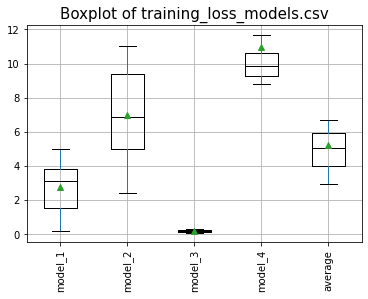

In [ ]:
key = list(all_dataframes.keys())[0]
df = all_dataframes[key]
print (key)
print (df.head(20))
all_min = df.min()
absolute_min = all_min.min()
num_epochs, num_models = df.shape

#df.style.apply(highlight_min)

#print (num_epochs, num_models)
all_colors = get_best_color_list(num_models)
all_columns = df.columns.tolist()
#fig, ax = plt.subplots()


# boxplots
# demonstrate how to customize the display different elements:
boxprops = dict(linestyle='-', linewidth=1, color='k')
medianprops = dict(linestyle='-', linewidth=1, color='k')

plt.figure(counter)
ax = df.boxplot(column=all_columns,
          showfliers=False, showmeans=True,
          boxprops=boxprops,
          medianprops=medianprops)
plt.title("Boxplot of %s" %key,fontsize=15)
# get rid of the automatic 'Boxplot grouped by group_by_column_name' title
plt.suptitle("")
ax.set_xticklabels(labels = all_columns ,rotation=90)
#plt.xticks(rotation=‌​45)

plt.show()


## Box plots

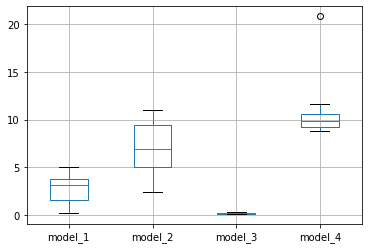

In [ ]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html
boxplot = df.boxplot(column=all_columns[:-1])

## Plots

In [ ]:
# get out the columns as lists
x_ax = df.index.tolist()
Y = dict() # dictionary

for c in all_columns:
  Y[c] = df[c].tolist()

## compare training loss and training accuracies of multiple models

NameError: ignored

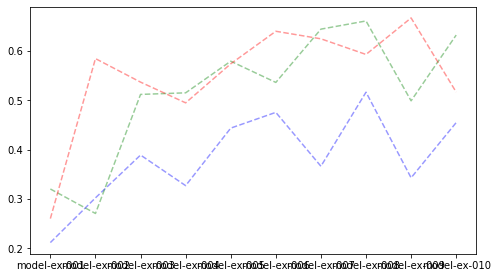

In [ ]:
fig = plt.figure(figsize=(8, 10))

plt.subplot(2, 1, 1)

thishandles=[]
for j in range(len(Y)):
    if j != len(Y)-1:
      key = list(Y.keys())[j]
      y = Y[key]
      this_color = all_colors[j]
      this_alpha = 0.4
      this_label = all_columns[j]
      plt.plot(x_ax, y,"--", color= this_color, alpha = this_alpha, label = this_label)
      thishandles.append(this_label)
    
    else:
      key = list(Y.keys())[j]
      y = Y[key]
      this_color = all_colors[j]
      this_alpha = 1
      this_label = all_columns[j]
      plt.plot(x, y, color= this_color, alpha = this_alpha, label = this_label)
      thishandles.append(this_label)

plt.xticks(rotation=90)
plt.yticks(rotation=90)
plt.legend(thishandles)
plt.xlabel("epochs", fontsize=15)
plt.ylabel("Loss ", fontsize=15)
plt.title(" Training Loss of %s models over %s epochs" %(num_models,num_epochs) , fontsize=15)

plt.subplot(2, 1, 2)
thishandles=[]
for j in range(len(Y)):
    if j != len(Y)-1:
      key = list(Y.keys())[j]
      y = Y[key]
      y = [(1/element) for element in y]
      this_color = all_colors[j]
      this_alpha = 0.4
      this_label = all_columns[j]
      plt.plot(x, y,"--", color= this_color, alpha = this_alpha, label = this_label)
      thishandles.append(this_label)
    
    else:
      key = list(Y.keys())[j]
      y = Y[key]
      y = [(1/element) for element in y] # this is just to fake accuracies
      this_color = all_colors[j]
      this_alpha = 1
      this_label = all_columns[j]
      plt.plot(x_ax, y, color= this_color, alpha = this_alpha, label = this_label)
      thishandles.append(this_label)

plt.xticks(rotation=90)
plt.yticks(rotation=90)
plt.legend(thishandles)
plt.xlabel("epochs", fontsize=15)
plt.ylabel("Loss ", fontsize=15)
plt.title(" Training Accuracy of %s models over %s epochs" %(num_models,num_epochs) , fontsize=15)

fig.tight_layout(pad=3.0)

## random values for dummy test

In [ ]:
import random

In [ ]:
# random accuracies

#all_col = 3*4
start = 0
array =  list()
for c in range(4):
  print ("----------------")
  start = start +0.1
  end = start+ 0.2
  sampling = []
  increment = 0.10
  for i in range(10):
    x = random.uniform(start,end)
    random_inc = random.uniform(0.01,0.08)
    increment = increment *(1+random_inc) 
    sampling.append(round(x+increment,3))
  array.append(sampling)
  for i in sampling:
    print (i)

----------------
0.231
0.263
0.247
0.28
0.228
0.413
0.251
0.342
0.402
0.285
----------------
0.45
0.413
0.362
0.473
0.421
0.383
0.371
0.397
0.409
0.382
----------------
0.49
0.476
0.453
0.431
0.47
0.59
0.445
0.48
0.552
0.577
----------------
0.534
0.541
0.709
0.609
0.551
0.556
0.643
0.689
0.592
0.653


In [ ]:
array

[[0.584, 0.602, 0.597, 0.631, 0.674, 0.612, 0.637, 0.71, 0.72, 0.636],
 [0.685, 0.651, 0.714, 0.636, 0.688, 0.675, 0.708, 0.708, 0.704, 0.745],
 [0.844, 0.784, 0.817, 0.821, 0.847, 0.824, 0.757, 0.858, 0.781, 0.81],
 [0.843, 0.855, 0.962, 0.944, 0.931, 0.859, 0.854, 0.954, 0.904, 0.896]]

In [ ]:
import numpy as np
a = np.array(array)
#print(a)
final = a.T
print (final)

[[0.584 0.685 0.844 0.843]
 [0.602 0.651 0.784 0.855]
 [0.597 0.714 0.817 0.962]
 [0.631 0.636 0.821 0.944]
 [0.674 0.688 0.847 0.931]
 [0.612 0.675 0.824 0.859]
 [0.637 0.708 0.757 0.854]
 [0.71  0.708 0.858 0.954]
 [0.72  0.704 0.781 0.904]
 [0.636 0.745 0.81  0.896]]


In [ ]:
df = pd.DataFrame(data=final)#, columns=all_columns[:-1])
df.head(10)

,0,1,2,3
0,0.584,0.685,0.844,0.843
1,0.602,0.651,0.784,0.855
2,0.597,0.714,0.817,0.962
3,0.631,0.636,0.821,0.944
4,0.674,0.688,0.847,0.931
5,0.612,0.675,0.824,0.859
6,0.637,0.708,0.757,0.854
7,0.710,0.708,0.858,0.954
8,0.720,0.704,0.781,0.904
9,0.636,0.745,0.810,0.896


In [ ]:
df[0]

0    0.584
1    0.602
2    0.597
3    0.631
4    0.674
5    0.612
6    0.637
7    0.710
8    0.720
9    0.636
Name: 0, dtype: float64